In [11]:
import numpy as np
from scipy.special import spherical_jn
import matplotlib.pyplot as plt
from matplotlib import rcParams

from cosmopy import cosmoLCDM
import imp
from cosmocl import theocl

In [2]:
rcParams.update({'font.size': 22})

---

### Spherical Bessel function
- $j_\ell(k\chi)$

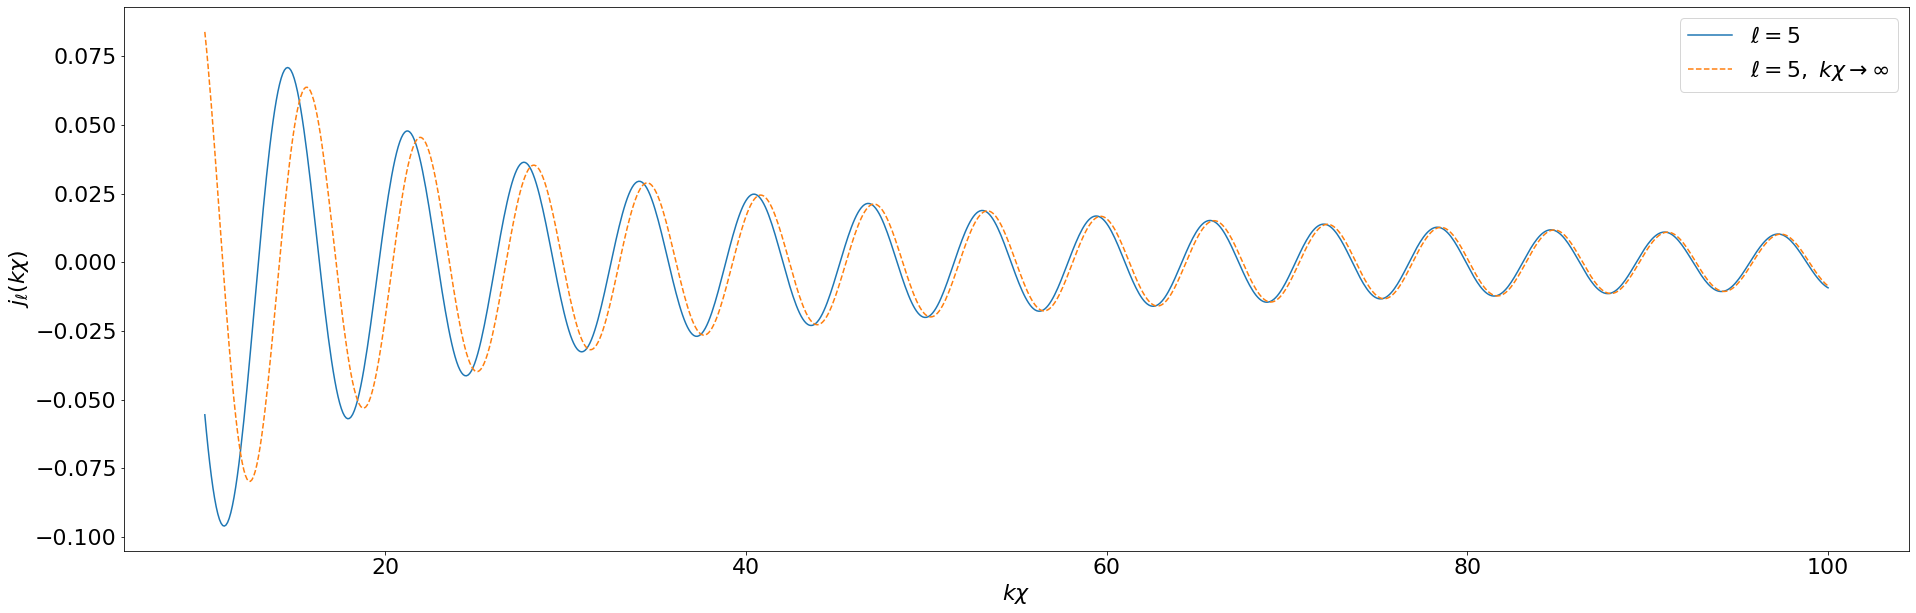

In [3]:
fig, (ax) = plt.subplots(ncols=1, nrows=1, figsize=(32, 10))

ells = np.array([5])
for ell in ells:
    kchi = np.linspace(10, 100, 1000)
    jell = spherical_jn(ell, kchi)
    ax.plot(kchi, jell, label=r'$\ell={:d}$'.format(ell))
    jell_limit = np.sin(kchi - ell*np.pi/2) / kchi
    ax.plot(kchi, jell_limit, ls='--', label=r'$\ell={:d},\ k\chi\rightarrow\infty$'.format(ell))

ax.set_xlabel('$k\chi$')
ax.set_ylabel('$j_\ell(k\chi)$')

ax.legend()
plt.show()

---

### Set up cosmology

In [4]:
cosmo = cosmoLCDM.cosmoLCDM(H0=67.66, Om0=0.3111, Ob0=0.04897, Tcmb0=2.7255, As=2.105e-9, ns=0.9665)
cosmo.gen_interp_chiz(zmin=0, zmax=1101, dz=0.01)
cosmo.gen_interp_D_z(zmin=0, zmax=1101, dz=0.01)

>> self.interp_chi2z(chi) and self.interp_z2chi(z) generated
>> for z in [0, 1101] with dz=0.01 interpolated with linear
>> self.interp_D_z(z) generated for z in [0, 1101] with dz=0.01 interpolated with linear


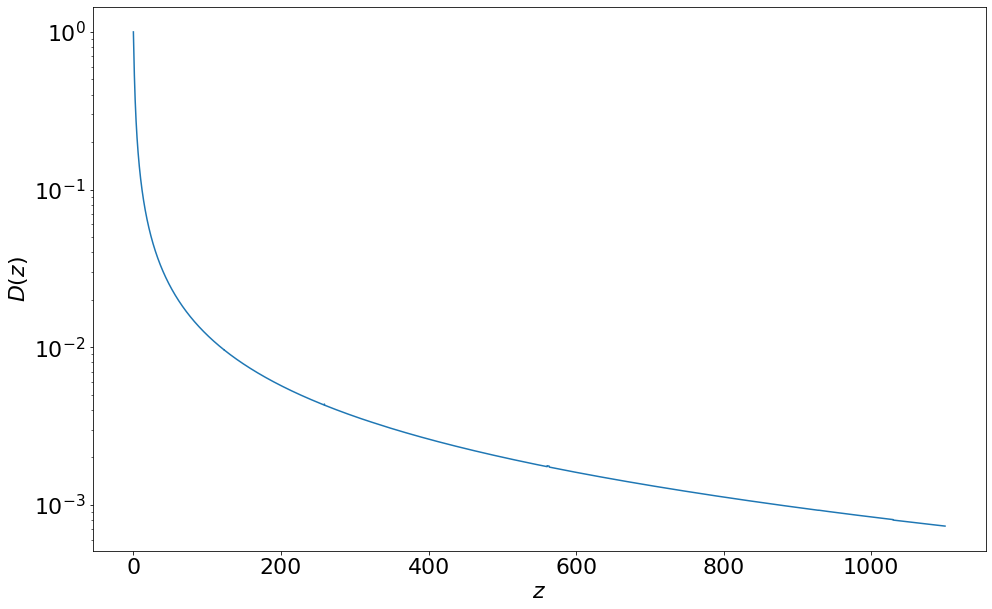

In [5]:
# plot D(z)
zs = np.linspace(0, 1100, 10000)
Ds = cosmo.interp_D_z(zs)

fig, (ax) = plt.subplots(1, 1, figsize=(16, 10))
ax.plot(zs, Ds)
# ax.set_xscale('log')
ax.set_xlabel(r'$z$')
ax.set_yscale('log')
ax.set_ylabel(r'$D(z)$')

plt.show()

In [6]:
# max chi
print('chi_CMB = {:.2f} Mpc'.format(cosmo.z2chi(1100)))

chi_CMB = 13882.21 Mpc


---

### Set up calculator

In [24]:
# reload after any modificaition
imp.reload(theocl)

<module 'cosmocl.theocl' from '/home/users/yz4035/local/py_mods/cosmocl/theocl.py'>

In [31]:
ccl = theocl.ccl(cosmo)

# set up sample points
chis = np.arange(0, ccl.chi_CMB, 1)
ks = np.arange(0, 0.01, 0.00001)
ccl.set_kchi_samp(ks, chis)

# set up ell
ells = np.arange(2, 10, 1)
ccl.set_ell(ells)

>> Number of CPUs: 24


---

### Kernel functions
- $\bar{W}_X(\chi)$

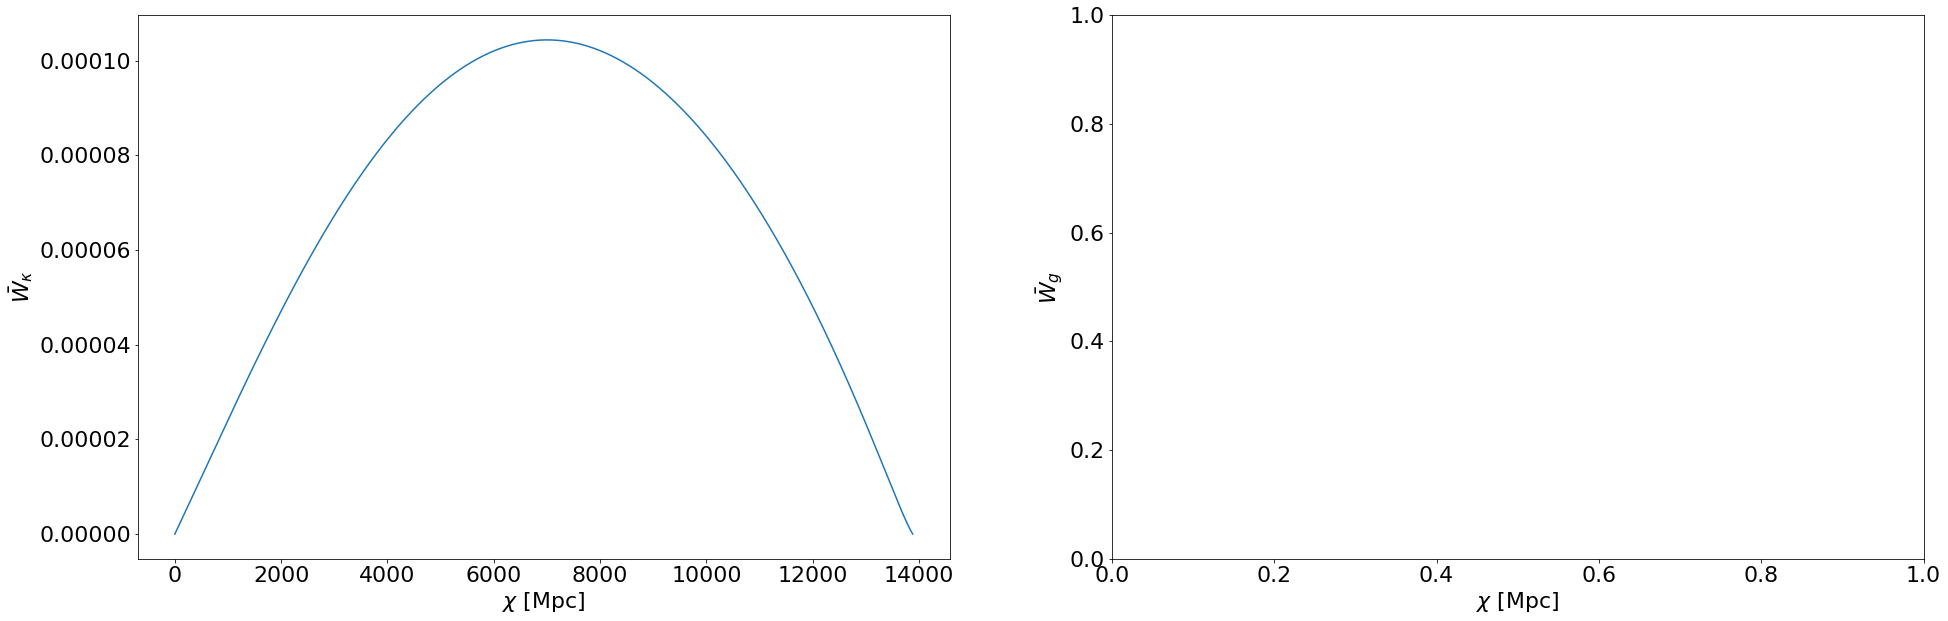

In [27]:
fig, (axs) = plt.subplots(ncols=2, nrows=1, figsize=(32, 10))

w_kappa = ccl.bar_W_kappa(chis)
# w_g = ccl.bar_W_g(chis)

axs[0].plot(chis, w_kappa)
# axs[1].plot(chis, w_g)

for ax in axs: ax.set_xlabel(r'$\chi$ [Mpc]')
axs[0].set_ylabel(r'$\bar{W}_\kappa$'); axs[1].set_ylabel(r'$\bar{W}_g$')

plt.show()

---

### Transfer functions
- $\Delta_{X,\ell}(k) = \int_0^\infty d\chi \bar{W}_X(\chi)j_\ell(k\chi)$

In [32]:
Delta_kappas = ccl.Delta_kappa()

No handles with labels found to put in legend.


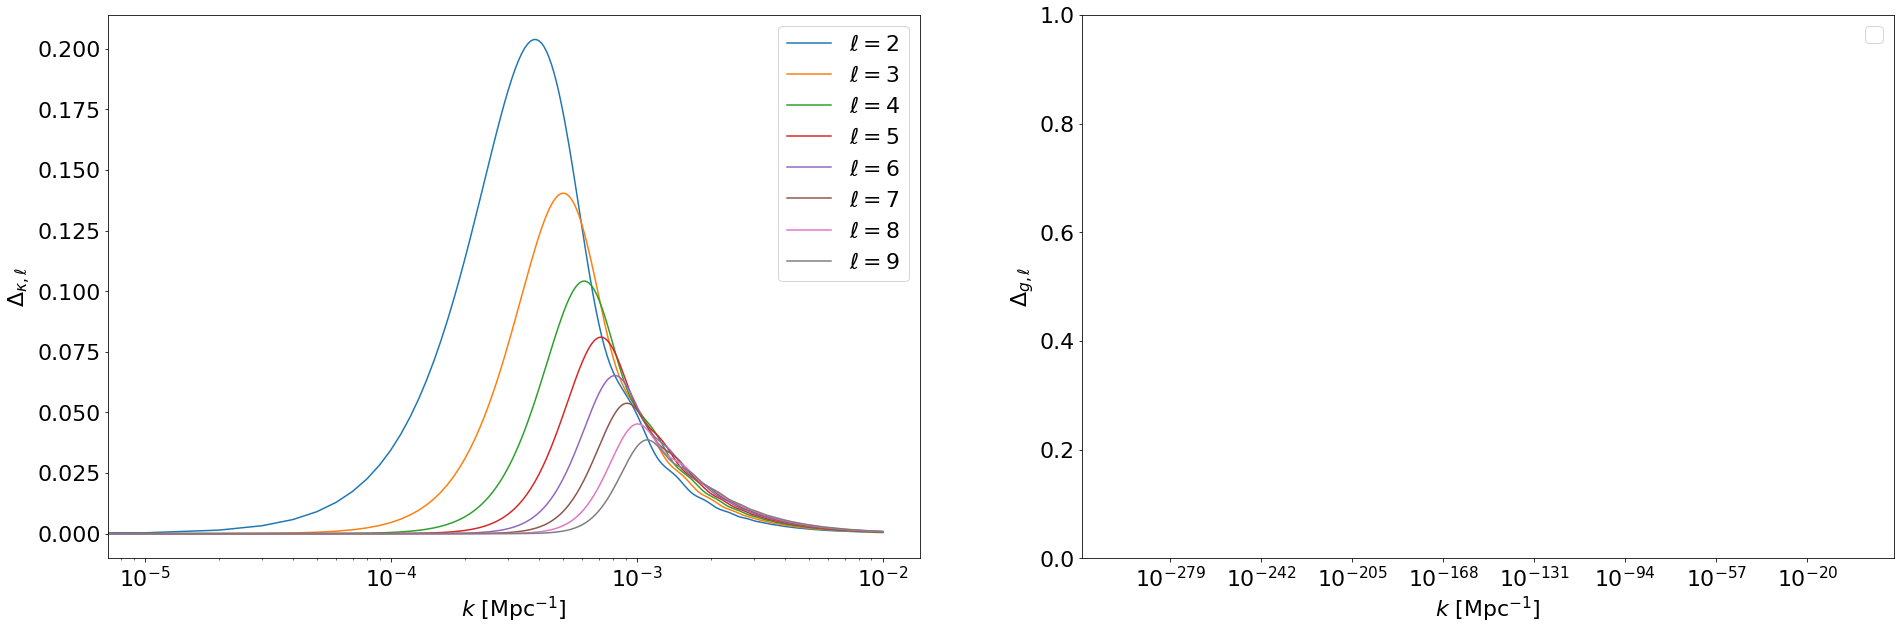

In [33]:
fig, (axs) = plt.subplots(ncols=2, nrows=1, figsize=(32, 10))

for i in range(ccl.ells.shape[0]):
    axs[0].plot(ccl.ks, Delta_kappas[i], label=r'$\ell={:d}$'.format(ccl.ells[i]))
    # axs[1].plot(ccl.ks, Delta_gs[i], label=r'$\ell={:d}$'.format(ell))

axs[0].set_ylabel(r'$\Delta_{\kappa,\ell}$'); axs[1].set_ylabel(r'$\Delta_{g,\ell}$')
for ax in axs:
    ax.set_xlabel(r'$k$ [Mpc$^{-1}$]')
    ax.legend()
    ax.set_xscale('log')

plt.show()

---

### Power spectra